In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# P3 - Open Food Facts

In [2]:
#Lecture du csv
data = pd.read_csv('fr.openfoodfacts.org.products.csv', sep='\t', low_memory=False)

## Description des données

In [3]:
row, col = data.shape
print(f'OpenFoodFacts contient {row} lignes et {col} colonnes.')

OpenFoodFacts contient 320772 lignes et 162 colonnes.


In [4]:
data.describe(exclude=[np.number])

code                                                url  \
count          320749                                             320749   
unique         320749                                             320749   
top     0000000003087  http://world-fr.openfoodfacts.org/produit/0000...   
freq                1                                                  1   

                creator   created_t      created_datetime last_modified_t  \
count            320770      320769                320763          320772   
unique             3535      189567                189568          180495   
top     usda-ndb-import  1489077120  2017-03-09T10:37:09Z      1439141742   
freq             169868          20                    20              33   

       last_modified_datetime product_name  \
count                  320772       303010   
unique                 180495       221347   
top      2015-08-09T17:35:42Z    Ice Cream   
freq                       33          410   

                                             generic_name quantity  ...  \
count                                               52795   104819  ...   
unique                                              38584    13826  ...   
top     Pâtes alimentaires au blé dur de qualité supér...    500 g  ...   
freq                                                  201     4669  ...   

       nutrition_grade_fr pnns_groups_1 pnns_groups_2  \
count              221210         91513         94491   
unique                  5            14            42   
top                     d       unknown       unknown   
freq                62763         22624         22624   

                                                   states  \
count                                              320726   
unique                                               1021   
top     en:to-be-completed, en:nutrition-facts-complet...   
freq                                               168905   

                                              states_tags  \
count                                              320726   
unique                                               1021   
top     en:to-be-completed,en:nutrition-facts-complete...   
freq                                               168905   

                                                states_fr main_category  \
count                                              320726         84366   
unique                                               1021          3543   
top     A compléter,Informations nutritionnelles compl...  en:beverages   
freq                                               168905          6054   

       main_category_fr                                          image_url  \
count             84366                                              75836   
unique             3543                                              75836   
top            Boissons  http://fr.openfoodfacts.org/images/products/00...   
freq               6054                                                  1   

                                          image_small_url  
count                                               75836  
unique                                              75836  
top     http://fr.openfoodfacts.org/images/products/00...  
freq                                                    1  

[4 rows x 56 columns]

In [5]:
data.describe()

no_nutriments    additives_n  ingredients_from_palm_oil_n  \
count            0.0  248939.000000                248939.000000   
mean             NaN       1.936024                     0.019659   
std              NaN       2.502019                     0.140524   
min              NaN       0.000000                     0.000000   
25%              NaN       0.000000                     0.000000   
50%              NaN       1.000000                     0.000000   
75%              NaN       3.000000                     0.000000   
max              NaN      31.000000                     2.000000   

       ingredients_from_palm_oil  ingredients_that_may_be_from_palm_oil_n  \
count                        0.0                            248939.000000   
mean                         NaN                                 0.055246   
std                          NaN                                 0.269207   
min                          NaN                                 0.000000   
25%                          NaN                                 0.000000   
50%                          NaN                                 0.000000   
75%                          NaN                                 0.000000   
max                          NaN                                 6.000000   

       ingredients_that_may_be_from_palm_oil  nutrition_grade_uk  \
count                                    0.0                 0.0   
mean                                     NaN                 NaN   
std                                      NaN                 NaN   
min                                      NaN                 NaN   
25%                                      NaN                 NaN   
50%                                      NaN                 NaN   
75%                                      NaN                 NaN   
max                                      NaN                 NaN   

        energy_100g  energy-from-fat_100g       fat_100g  ...    ph_100g  \
count  2.611130e+05            857.000000  243891.000000  ...  49.000000   
mean   1.141915e+03            585.501214      12.730379  ...   6.425698   
std    6.447154e+03            712.809943      17.578747  ...   2.047841   
min    0.000000e+00              0.000000       0.000000  ...   0.000000   
25%    3.770000e+02             49.400000       0.000000  ...   6.300000   
50%    1.100000e+03            300.000000       5.000000  ...   7.200000   
75%    1.674000e+03            898.000000      20.000000  ...   7.400000   
max    3.251373e+06           3830.000000     714.290000  ...   8.400000   

       fruits-vegetables-nuts_100g  collagen-meat-protein-ratio_100g  \
count                  3036.000000                        165.000000   
mean                     31.458587                         15.412121   
std                      31.967918                          3.753028   
min                       0.000000                          8.000000   
25%                       0.000000                         12.000000   
50%                      23.000000                         15.000000   
75%                      51.000000                         15.000000   
max                     100.000000                         25.000000   

       cocoa_100g  chlorophyl_100g  carbon-footprint_100g  \
count  948.000000              0.0             268.000000   
mean    49.547785              NaN             341.700764   
std     18.757932              NaN             425.211439   
min      6.000000              NaN               0.000000   
25%     32.000000              NaN              98.750000   
50%     50.000000              NaN             195.750000   
75%     64.250000              NaN             383.200000   
max    100.000000              NaN            2842.000000   

       nutrition-score-fr_100g  nutrition-score-uk_100g  glycemic-index_100g  \
count            221210.000000            221210.000000                  0.0   
mean                  9.165535             

<Axes: >

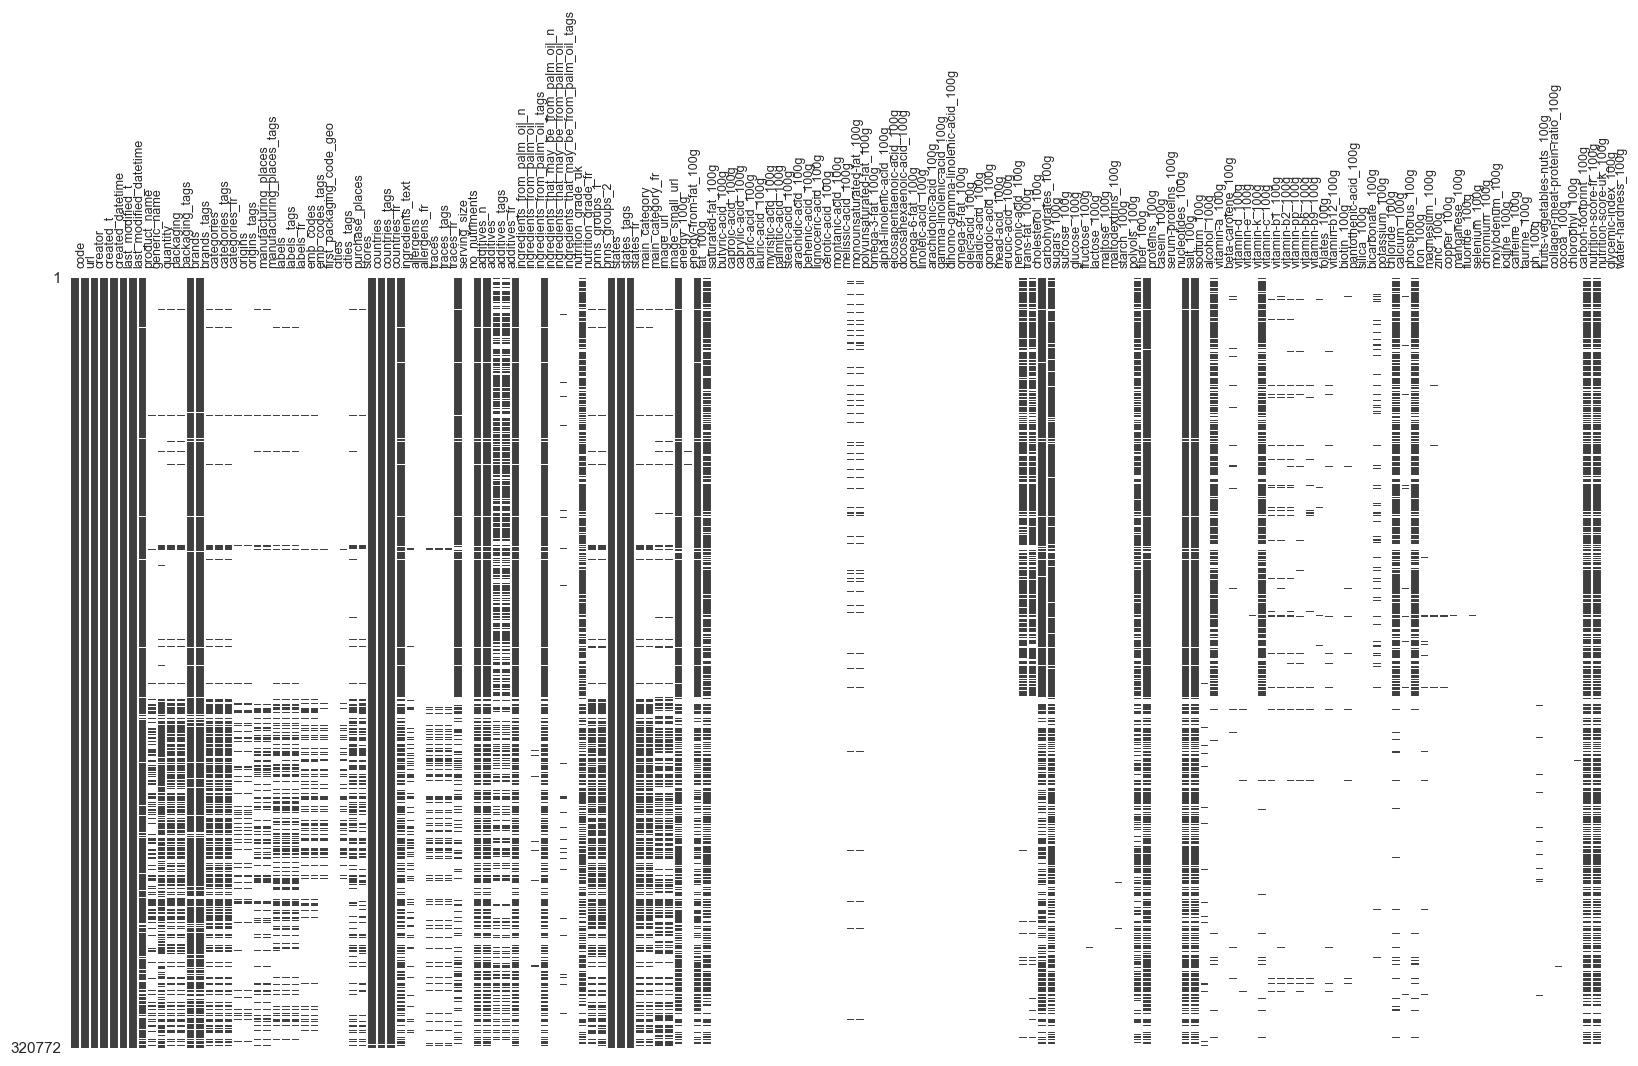

In [6]:
msno.matrix(data, sparkline=False,figsize=(20, 10),fontsize=9, labels=all(data), label_rotation=90)

<Axes: >

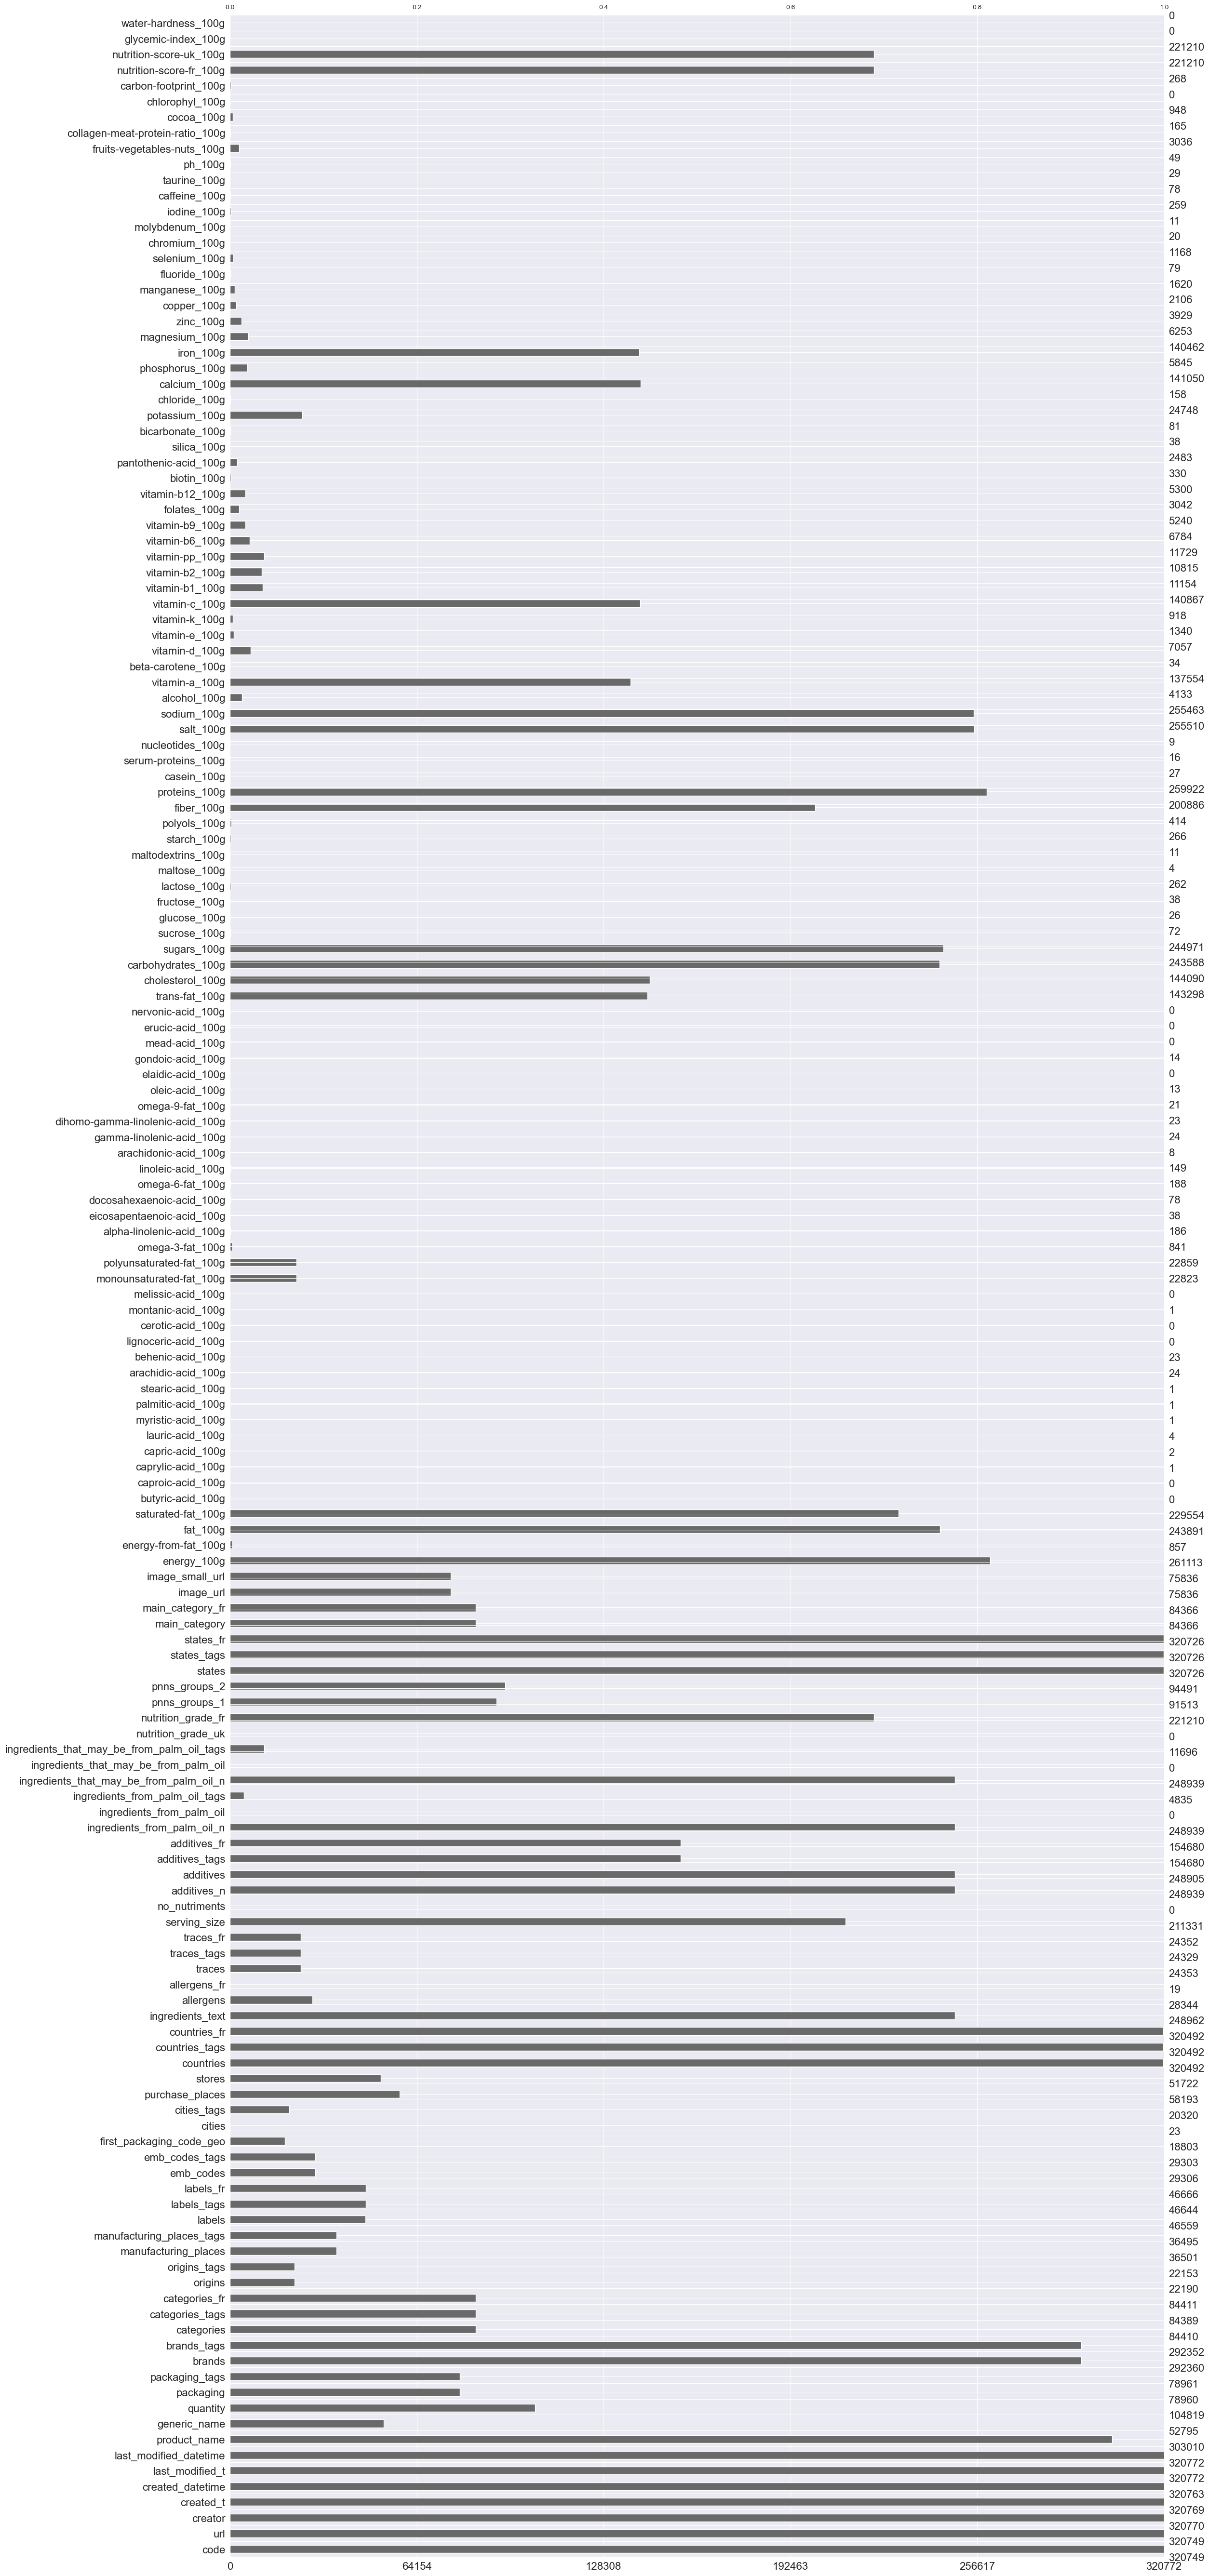

In [7]:
msno.bar(data)

In [8]:
data.isna().mean().mean()

0.7622157263195134

In [9]:
data.head(20)

code                                                url  \
0   0000000003087  http://world-fr.openfoodfacts.org/produit/0000...   
1   0000000004530  http://world-fr.openfoodfacts.org/produit/0000...   
2   0000000004559  http://world-fr.openfoodfacts.org/produit/0000...   
3   0000000016087  http://world-fr.openfoodfacts.org/produit/0000...   
4   0000000016094  http://world-fr.openfoodfacts.org/produit/0000...   
5   0000000016100  http://world-fr.openfoodfacts.org/produit/0000...   
6   0000000016117  http://world-fr.openfoodfacts.org/produit/0000...   
7   0000000016124  http://world-fr.openfoodfacts.org/produit/0000...   
8   0000000016193  http://world-fr.openfoodfacts.org/produit/0000...   
9   0000000016513  http://world-fr.openfoodfacts.org/produit/0000...   
10  0000000016612  http://world-fr.openfoodfacts.org/produit/0000...   
11  0000000016650  http://world-fr.openfoodfacts.org/produit/0000...   
12  0000000016872  http://world-fr.openfoodfacts.org/produit/0000...   
13  0000000016933  http://world-fr.openfoodfacts.org/produit/0000...   
14  0000000017497  http://world-fr.openfoodfacts.org/produit/0000...   
15  0000000018012  http://world-fr.openfoodfacts.org/produit/0000...   
16  0000000018050  http://world-fr.openfoodfacts.org/produit/0000...   
17  0000000018173  http://world-fr.openfoodfacts.org/produit/0000...   
18  0000000018197  http://world-fr.openfoodfacts.org/produit/0000...   
19  0000000018227  http://world-fr.openfoodfacts.org/produit/0000...   

                       creator   created_t      created_datetime  \
0   openfoodfacts-contributors  1474103866  2016-09-17T09:17:46Z   
1              usda-ndb-import  1489069957  2017-03-09T14:32:37Z   
2              usda-ndb-import  1489069957  2017-03-09T14:32:37Z   
3              usda-ndb-import  1489055731  2017-03-09T10:35:31Z   
4              usda-ndb-import  1489055653  2017-03-09T10:34:13Z   
5              usda-ndb-import  1489055651  2017-03-09T10:34:11Z   
6              usda-ndb-import  1489055730  2017-03-09T10:35:30Z   
7              usda-ndb-import  1489055711  2017-03-09T10:35:11Z   
8              usda-ndb-import  1489055651  2017-03-09T10:34:11Z   
9              usda-ndb-import  1489055654  2017-03-09T10:34:14Z   
10             usda-ndb-import  1489055731  2017-03-09T10:35:31Z   
11             usda-ndb-import  1489055668  2017-03-09T10:34:28Z   
12             usda-ndb-import  1489055650  2017-03-09T10:34:10Z   
13             usda-ndb-import  1489055651  2017-03-09T10:34:11Z   
14             usda-ndb-import  1489055678  2017-03-09T10:34:38Z   
15             usda-ndb-import  1489055652  2017-03-09T10:34:12Z   
16             usda-ndb-import  1489050462  2017-03-09T09:07:42Z   
17             usda-ndb-import  1489055667  2017-03-09T10:34:27Z   
18             usda-ndb-import  1489055652  2017-03-09T10:34:12Z   
19             usda-ndb-import  1489055682  2017-03-09T10:34:42Z   

   last_modified_t last_modified_datetime                       product_name  \
0       1474103893   2016-09-17T09:18:13Z                 Farine de blé noir   
1       1489069957   2017-03-09T14:32:37Z     Banana Chips Sweetened (Whole)   
2       1489069957   2017-03-09T14:32:37Z                            Peanuts   
3       1489055731   2017-03-09T10:35:31Z             Organic Salted Nut Mix   
4       1489055653   2017-03-09T10:34:13Z                    Organic Polenta   
5       1489055651   2017-03-09T10:34:11Z  Breadshop Honey Gone Nuts Granola   
6       1489055730   2017-03-09T10:35:30Z      Organic Long Grain White Rice   
7       1489055712   2017-03-09T10:35:12Z                     Organic Muesli   
8       1489055651   2017-03-09T10:34:11Z       Organic Dark Chocolate Minis   
9       1489055654   2017-03-09T10:34:14Z              Organic Sunflower Oil   
10      1489055731   2017-03-09T10:35:31Z               Organic Adzuki Beans   
11      1489055668   2017-03-09T10:34:28Z                Organic Penne Pasta   
12      1489055651   2017-03-09

## Nettoyage des données

On supprime les colonnes où plus de 80% des données sont vides

In [10]:
data.drop(data.columns[data.isnull().mean()>0.8], axis=1, inplace=True)

<Axes: >

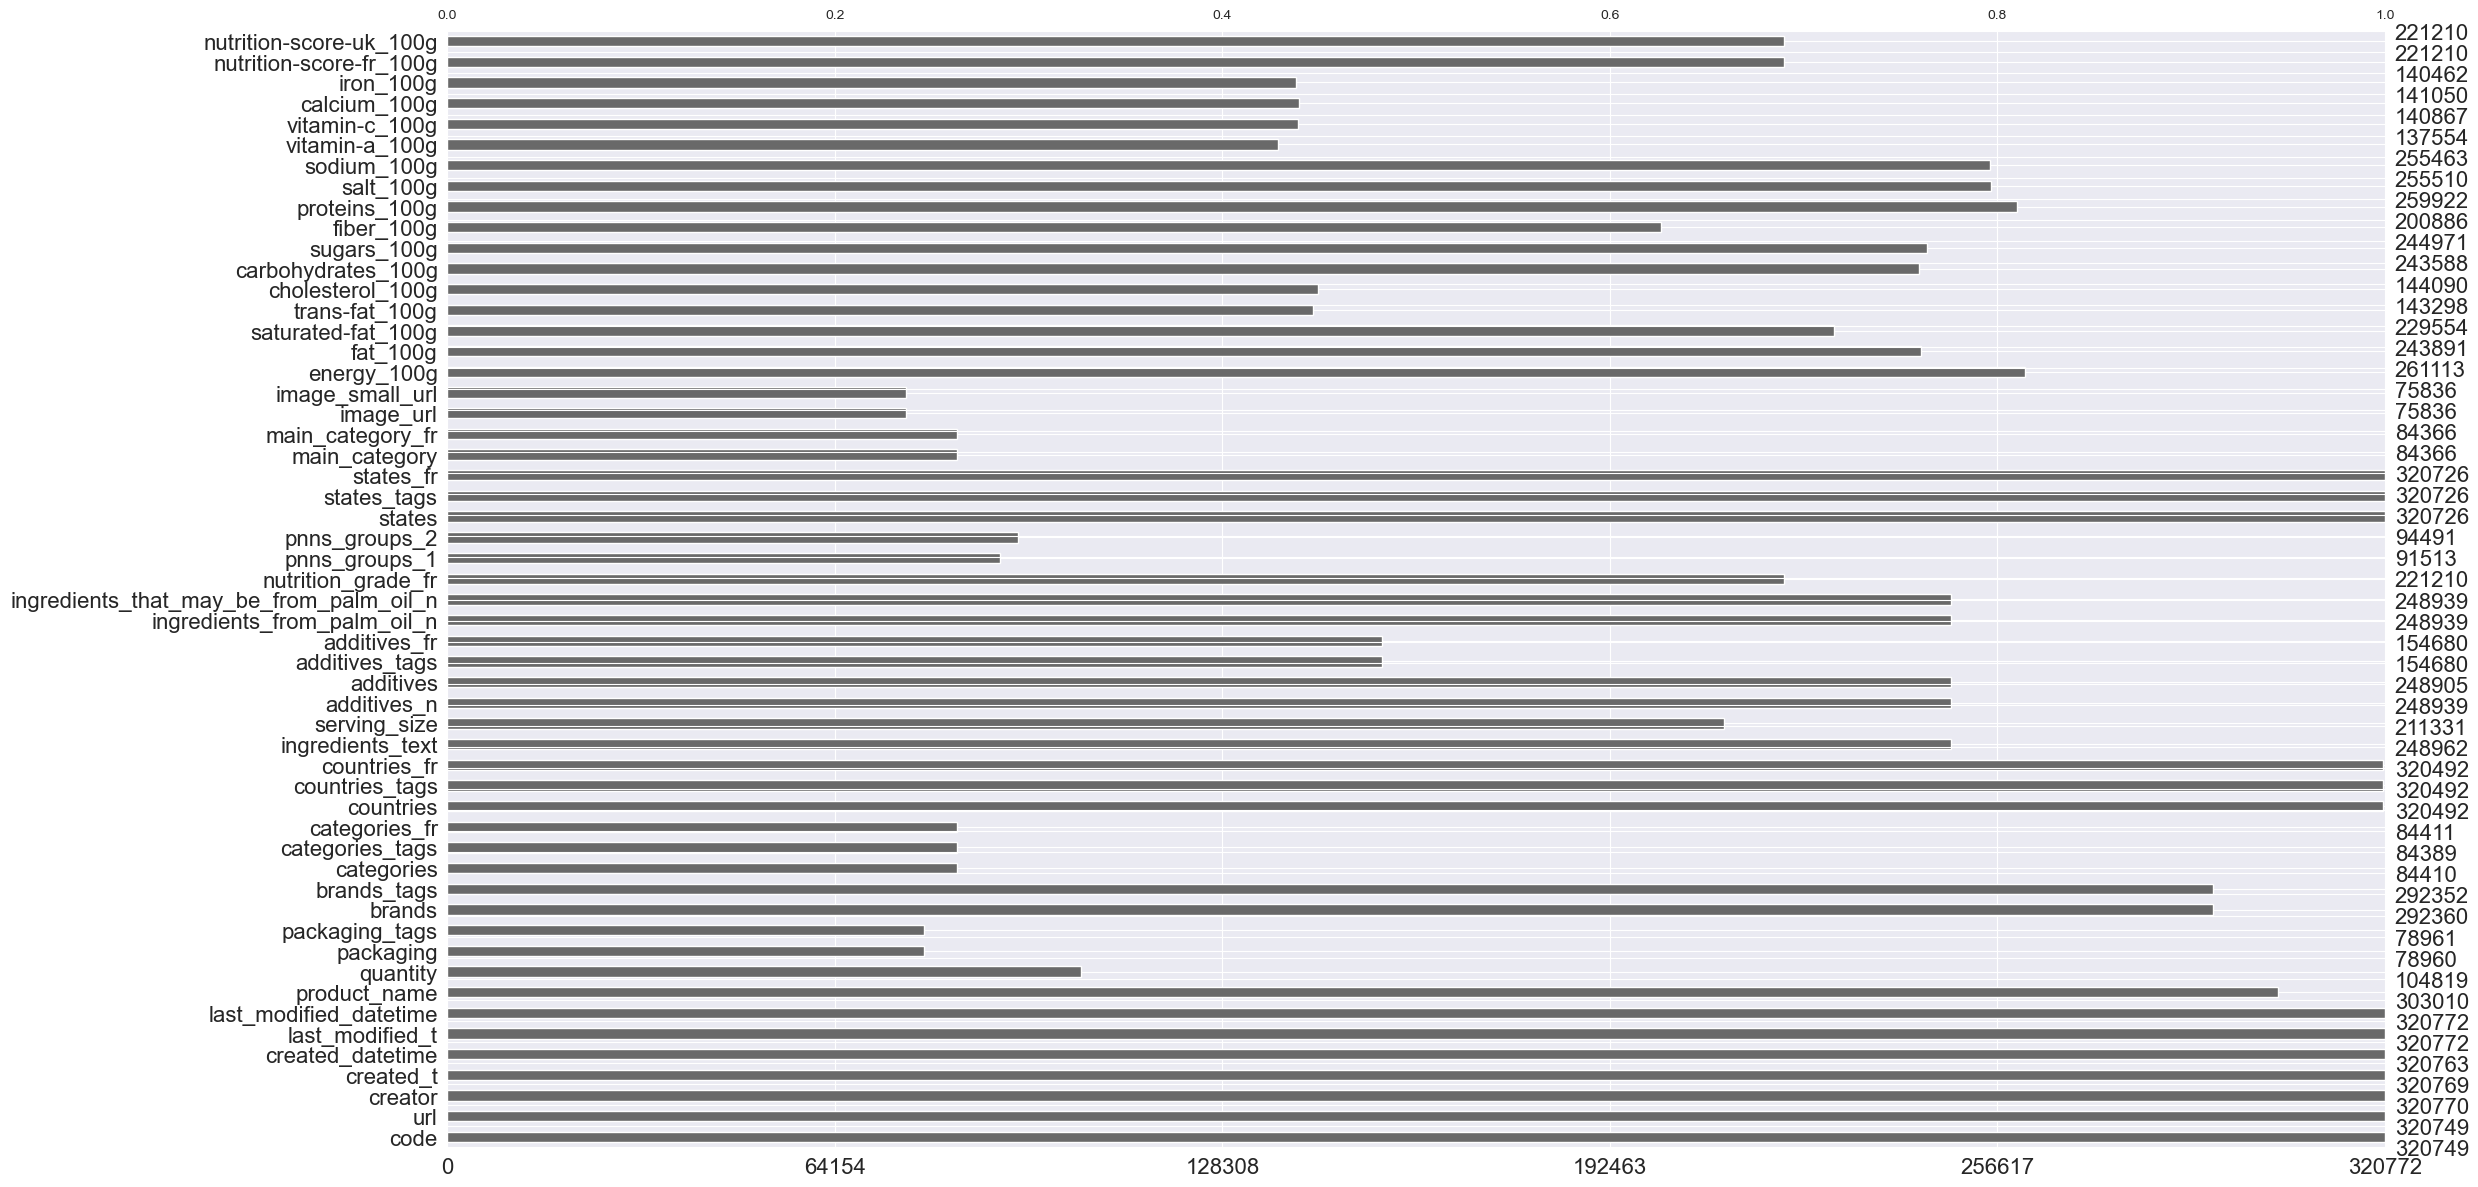

In [11]:
msno.bar(data)

In [12]:
row, col = data.shape
print(f'OpenFoodFacts contient {row} lignes et {col} colonnes.')

OpenFoodFacts contient 320772 lignes et 54 colonnes.


## Exploration

In [13]:
# On récupère seulement les lignes dont la colonne pnns_group_2 est remplie
pnns2 = data[~data['pnns_groups_2'].isna()]

<Axes: >

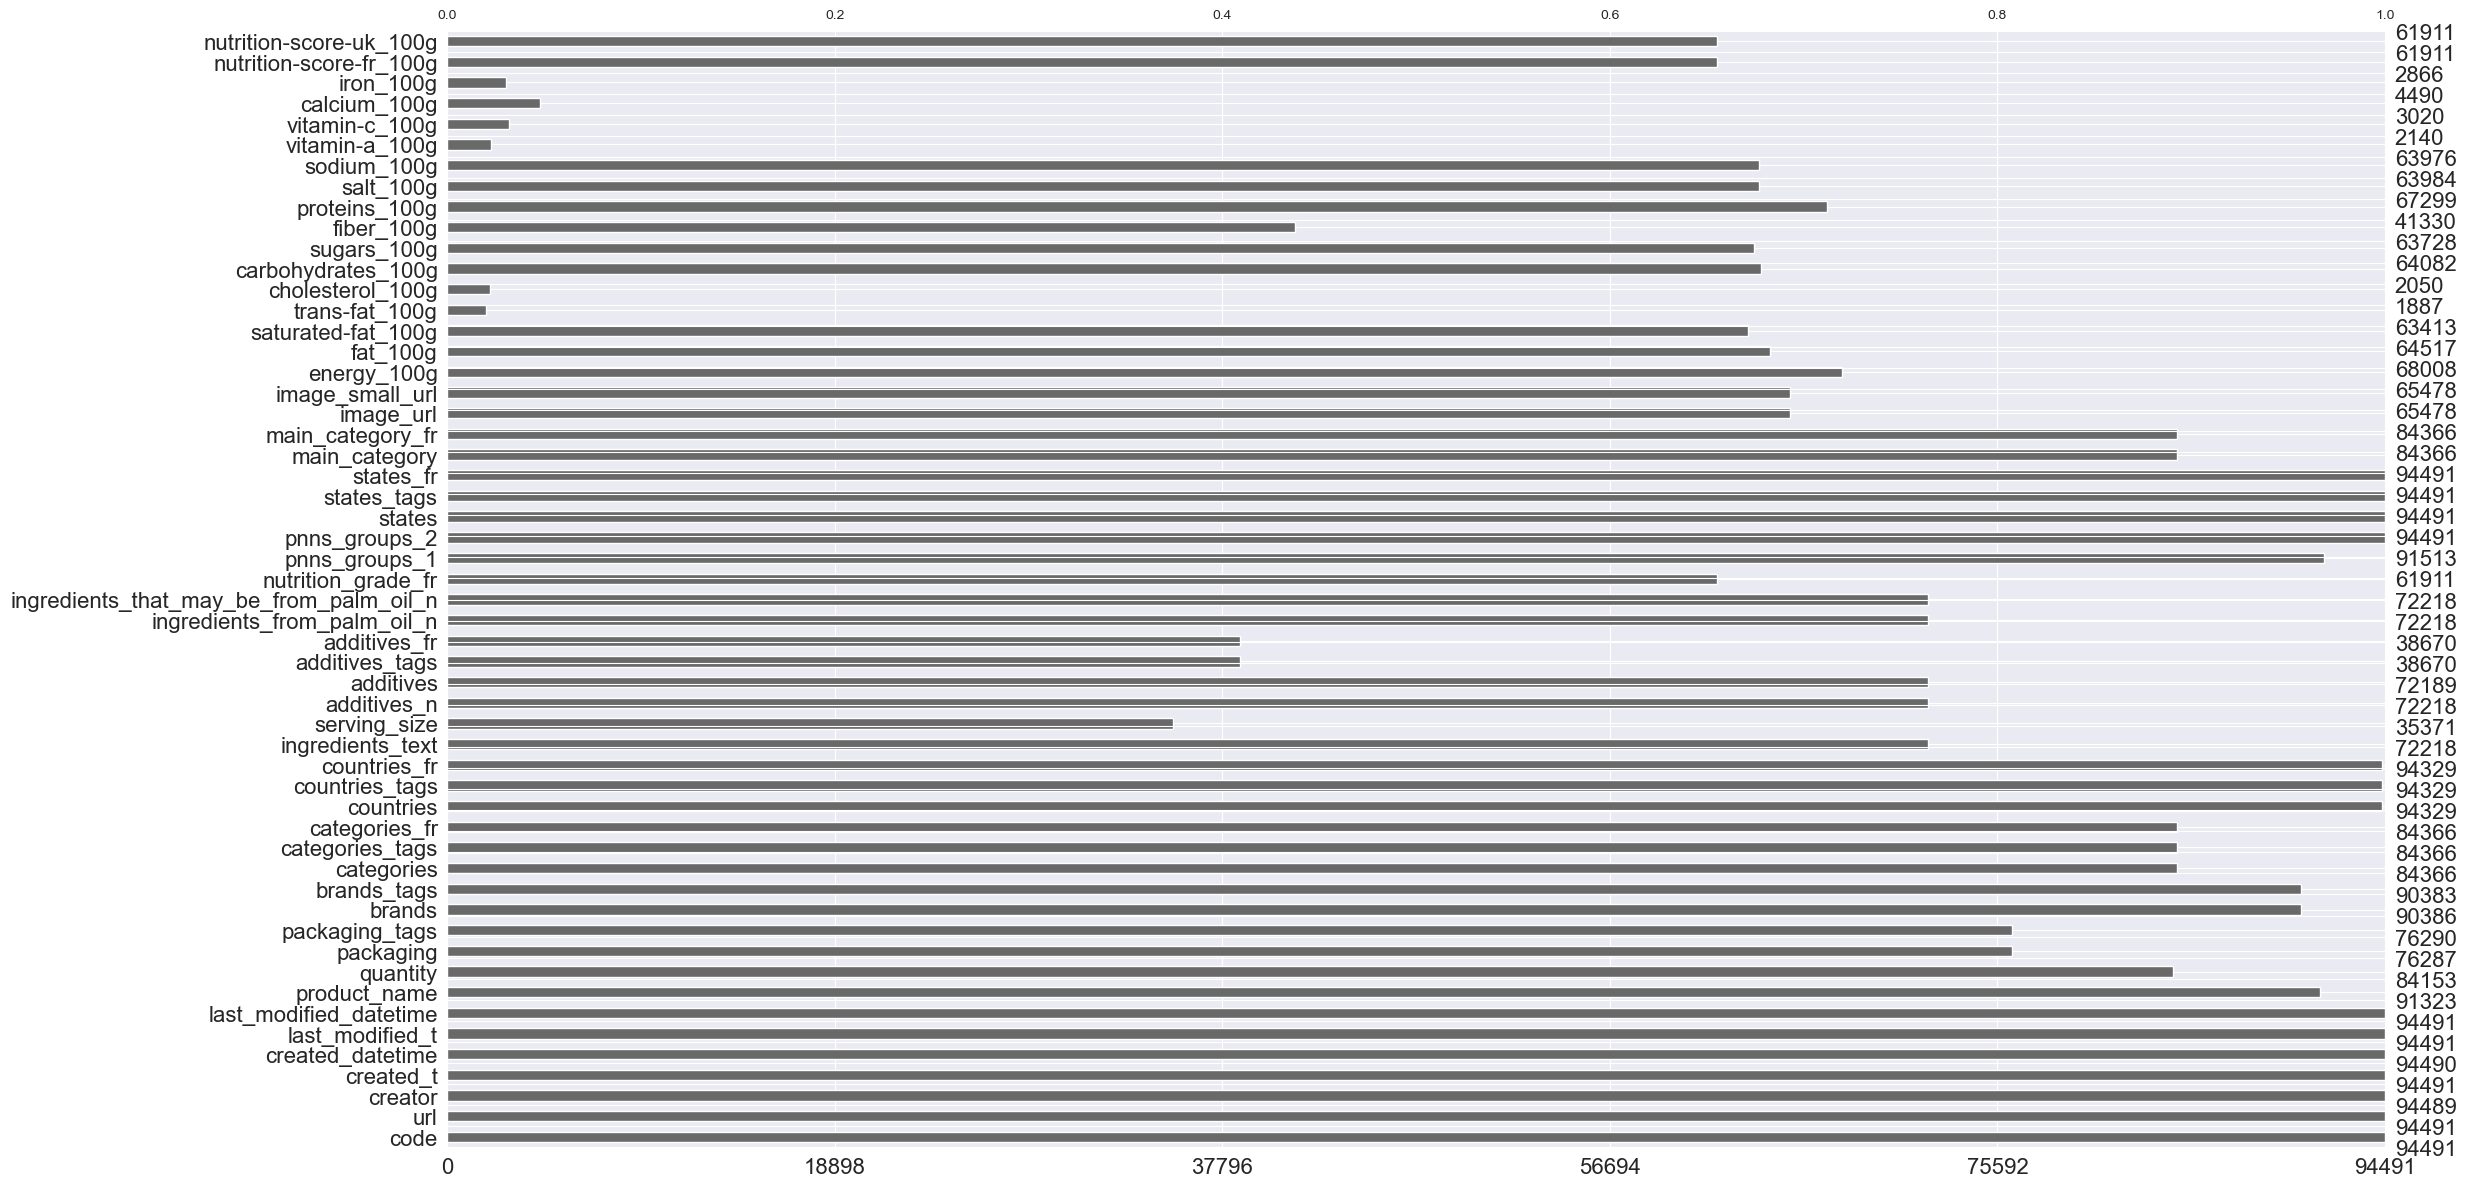

In [14]:
msno.bar(pnns2)

In [15]:
pnns2.isna().mean().mean()

0.27255447020821505

In [16]:
# On supprime les colonnes dont plus de 50% des données sont vides
pnns2.drop(pnns2.columns[pnns2.isnull().mean()>0.5], axis=1, inplace=True)

C:\Users\adrie\AppData\Local\Temp\ipykernel_19332\1241322802.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pnns2.drop(pnns2.columns[pnns2.isnull().mean()>0.5], axis=1, inplace=True)


<Axes: >

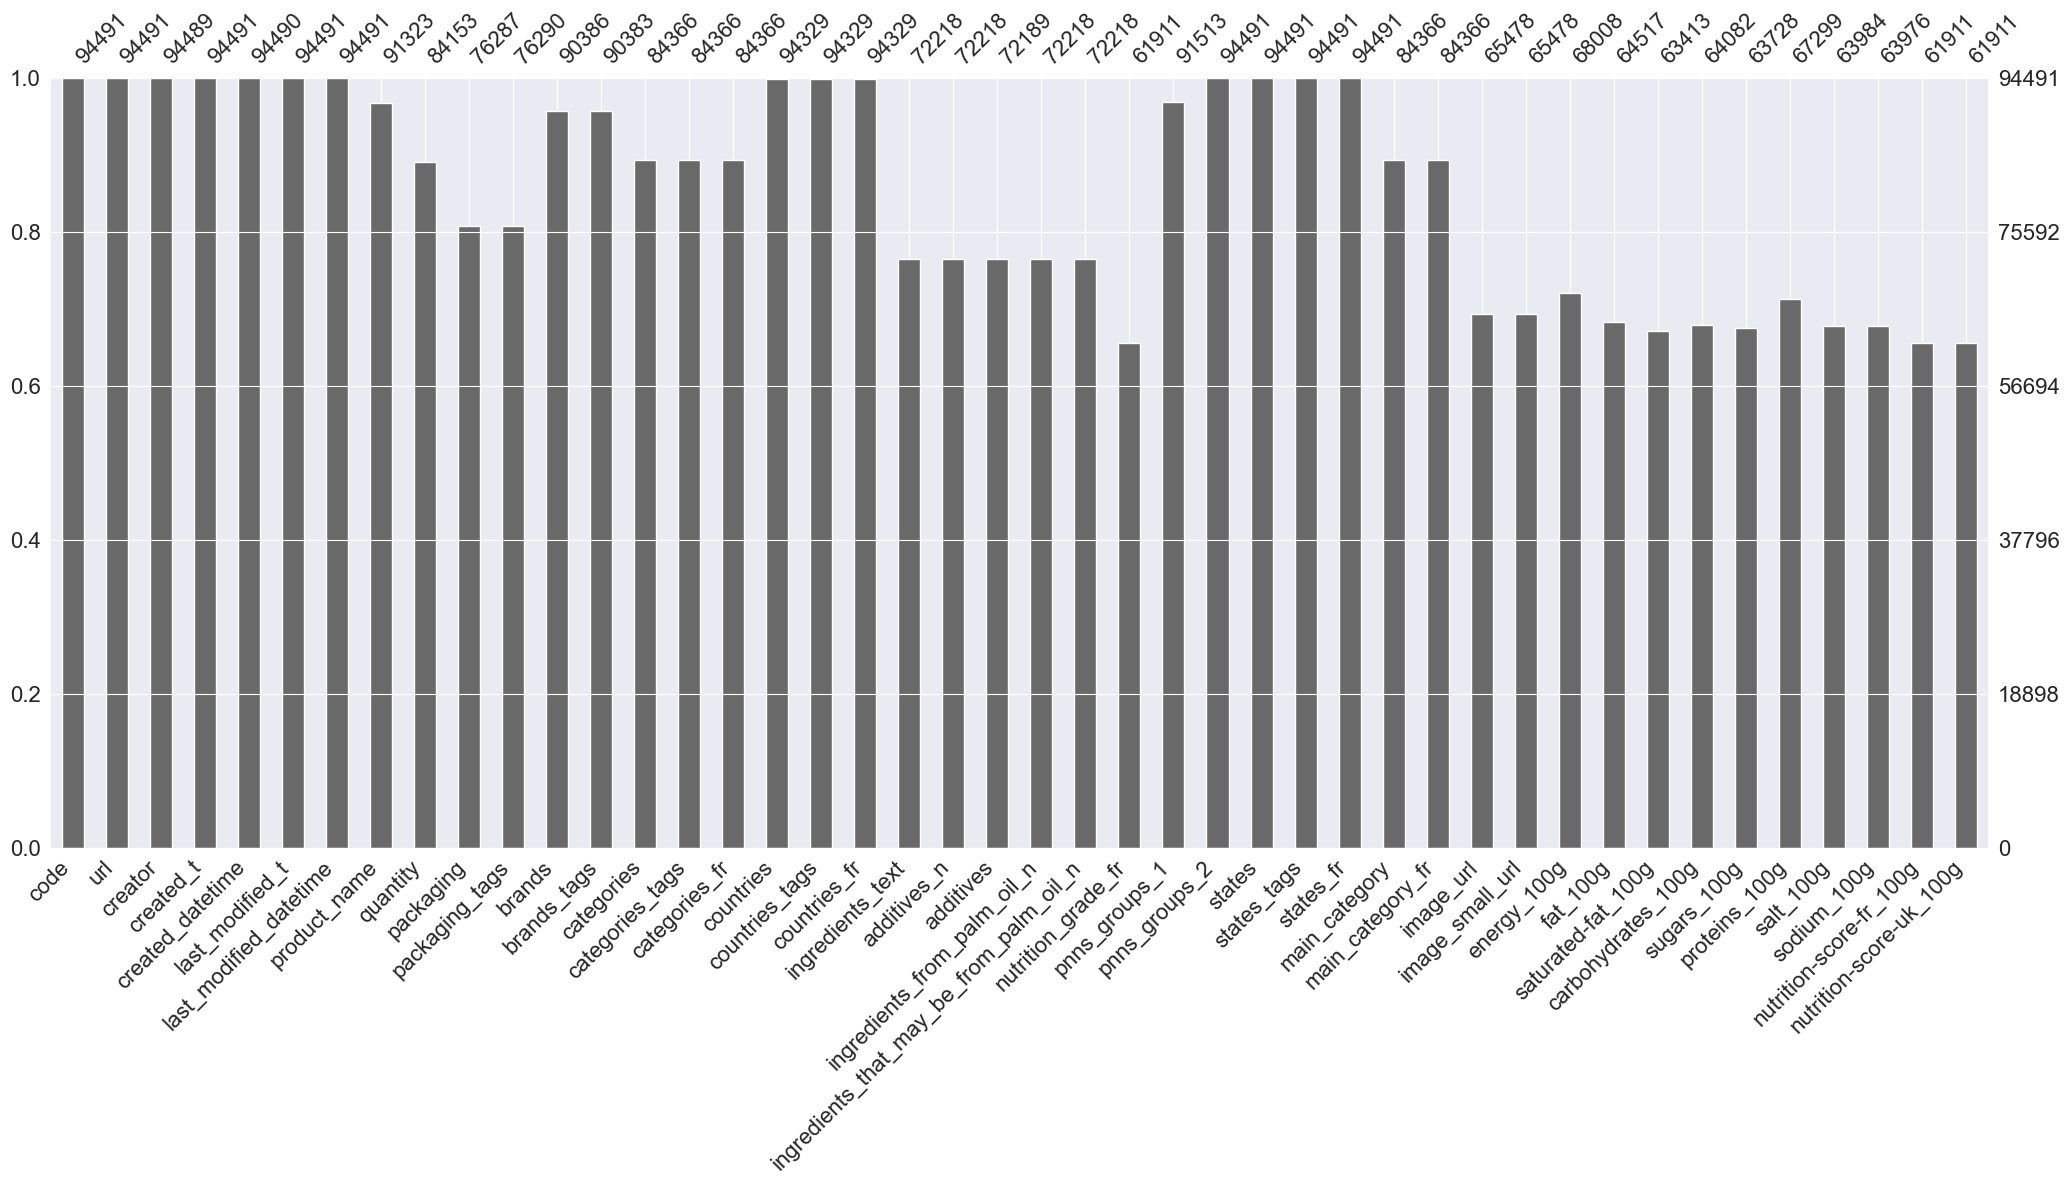

In [17]:
msno.bar(pnns2)

In [18]:
pnns2.isna().mean().mean()

0.14823369421426377

Suppression des colonnes qui ne nous intéresserait pas 
Date de création/modification qui existe plusieurs fois

In [19]:
pnns2 = pnns2.drop(columns=['created_t','last_modified_t'],axis=1)

In [20]:
pnns2 = pnns2.drop(columns=['packaging','packaging_tags','brands','brands_tags','categories','categories_fr','countries','countries_tags','additives','additives_n','states','states_fr','main_category','image_url','image_small_url','nutrition-score-uk_100g'], axis=1)

<Axes: >

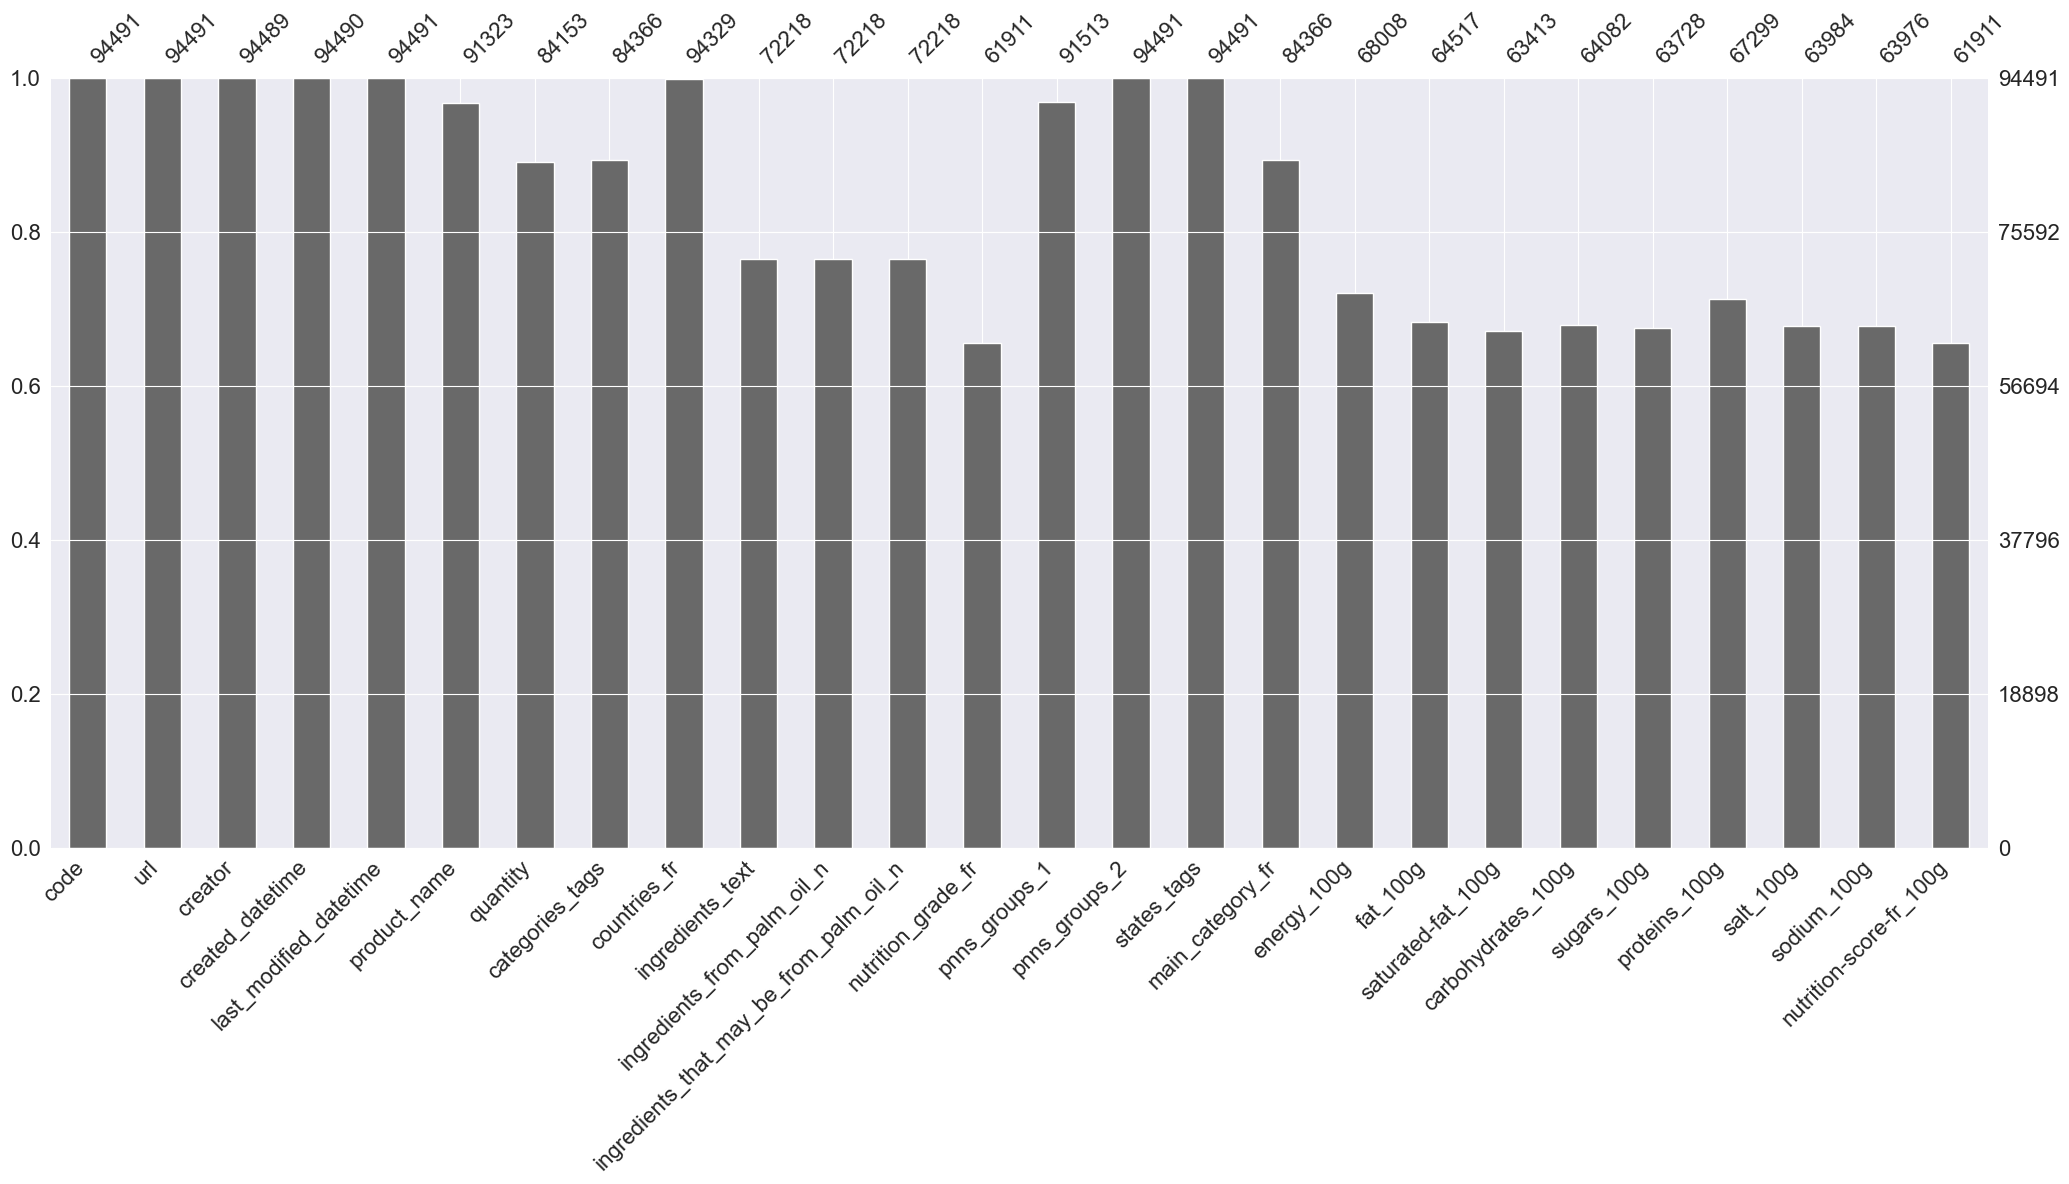

In [21]:
msno.bar(pnns2)

<Axes: >

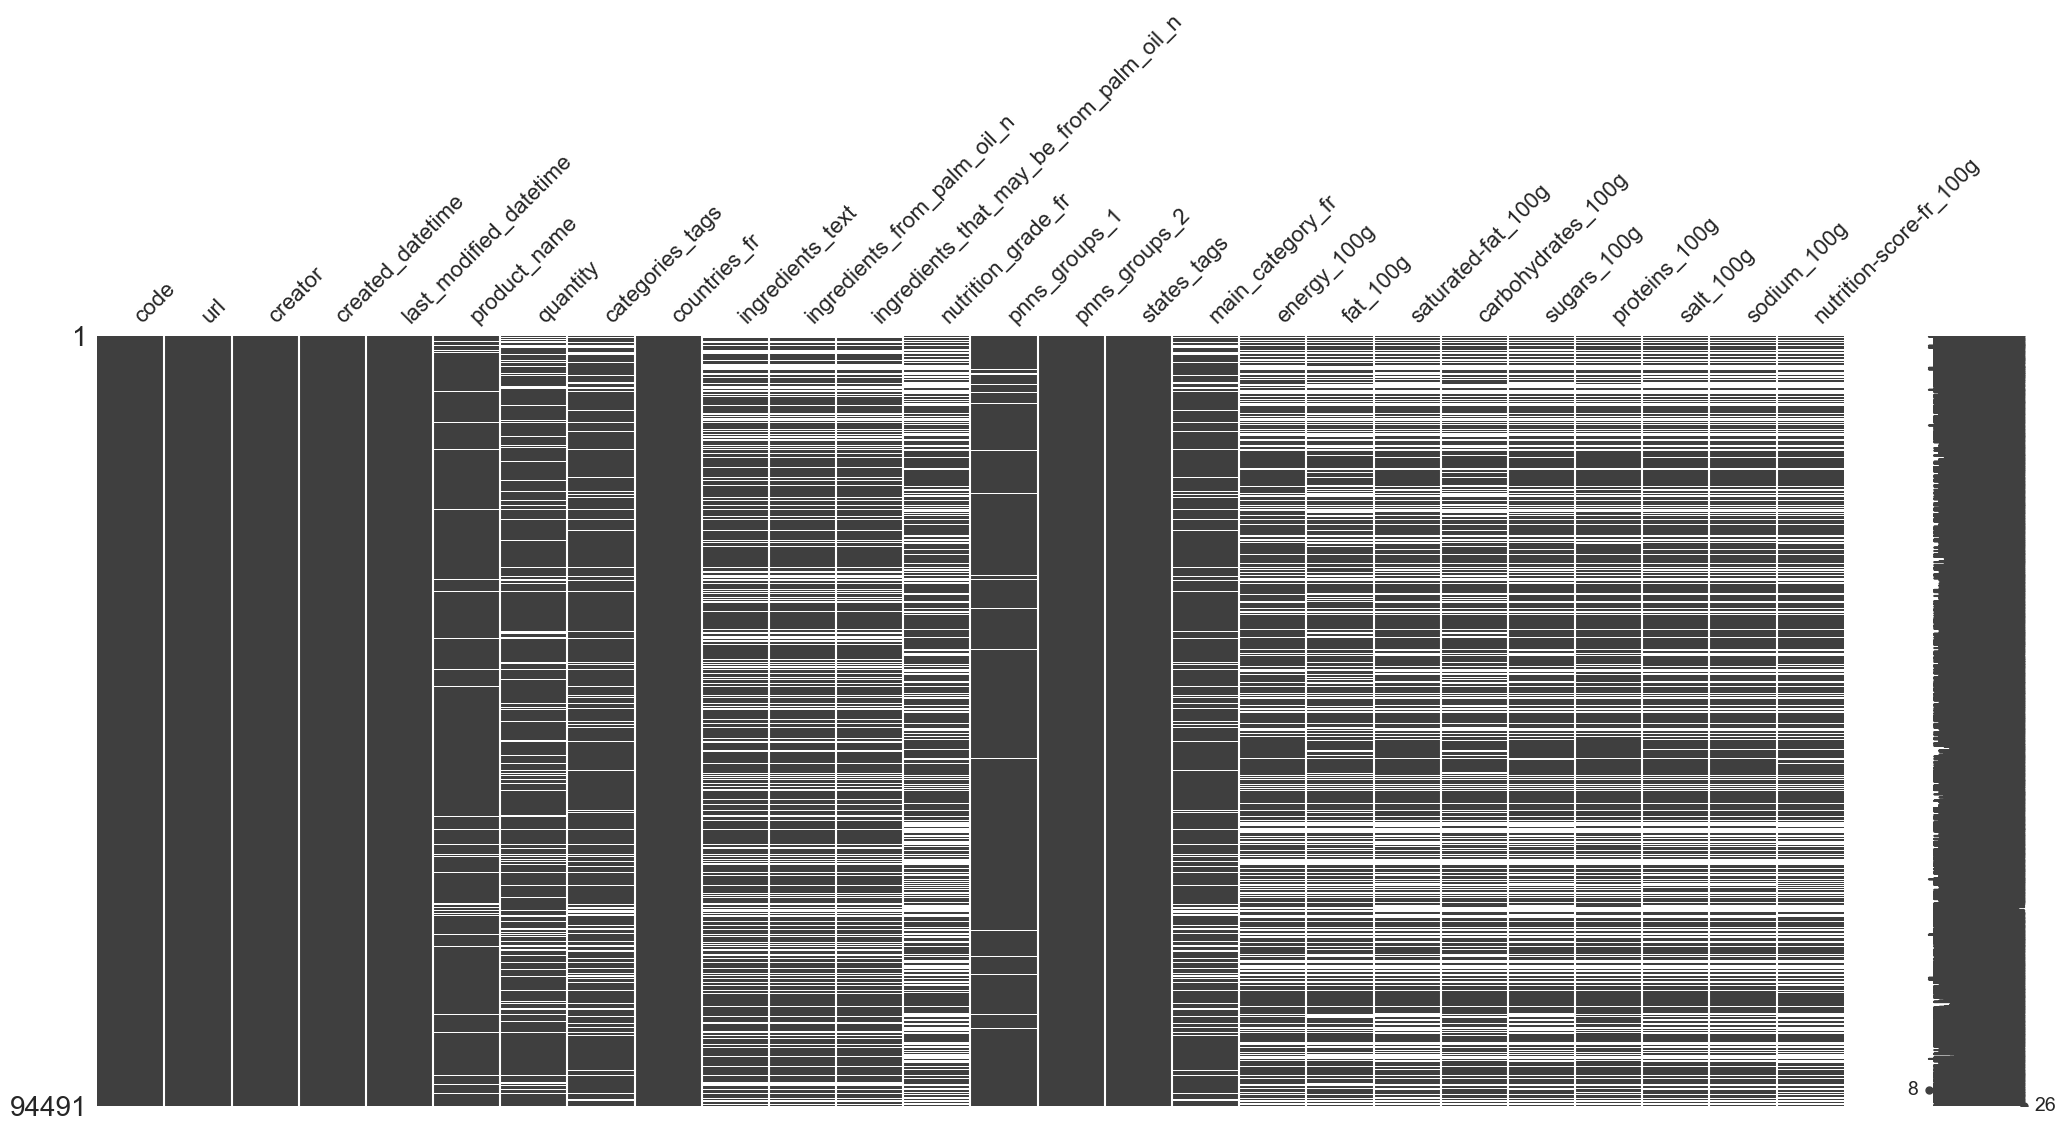

In [22]:
msno.matrix(pnns2)

In [23]:
pnns2.dropna(inplace=True)

C:\Users\adrie\anaconda3\envs\OpenFoodFact\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


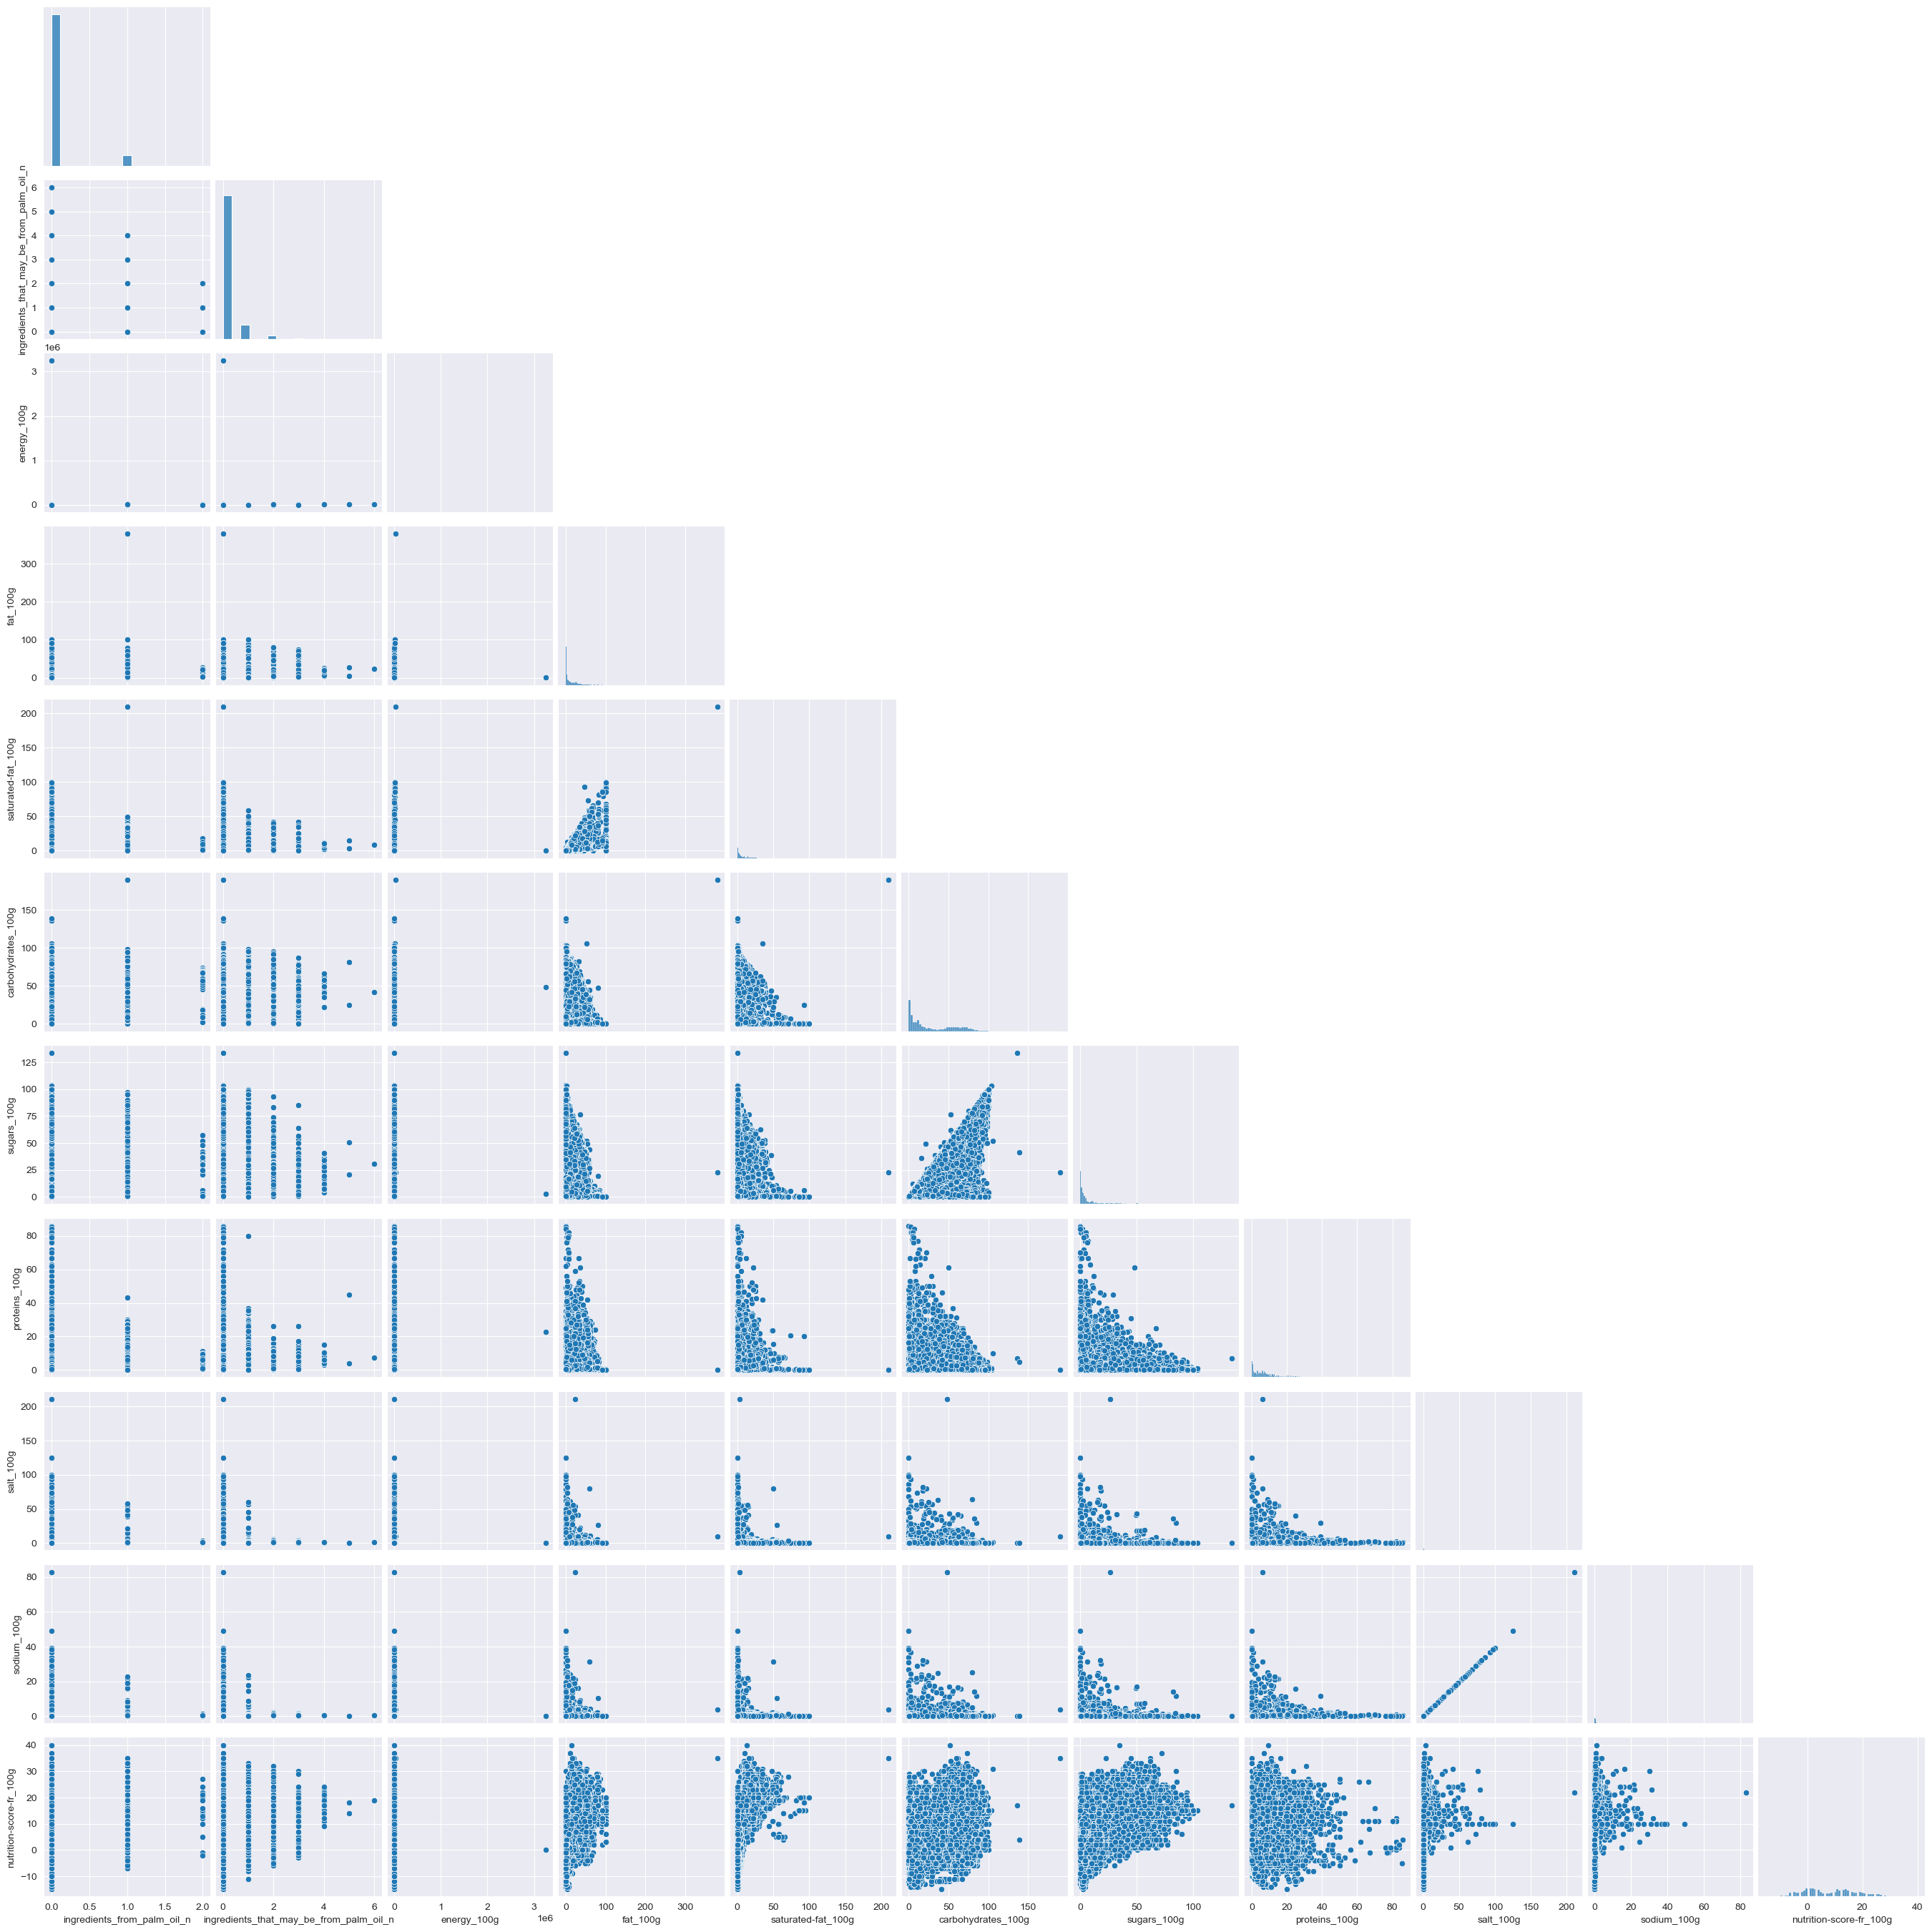

In [24]:
sns.pairplot(pnns2, corner=True)

<Axes: >

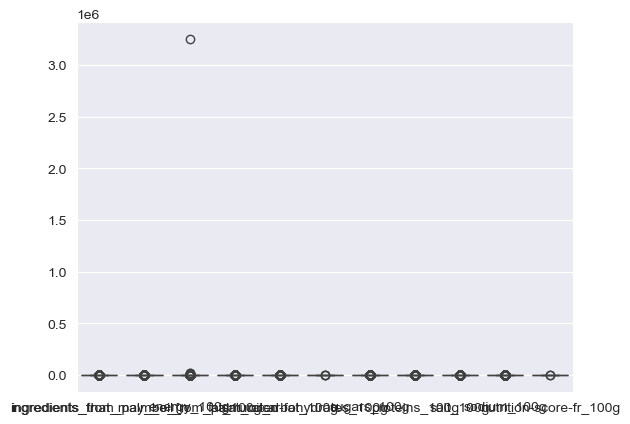

In [25]:
sns.boxplot(data=pnns2)

Des données d'énergie dépassent l'apport calorique maximum, qui est de 900,00 kcal

In [26]:
pnns2 = pnns2.loc[pnns2['energy_100g'] < 900]

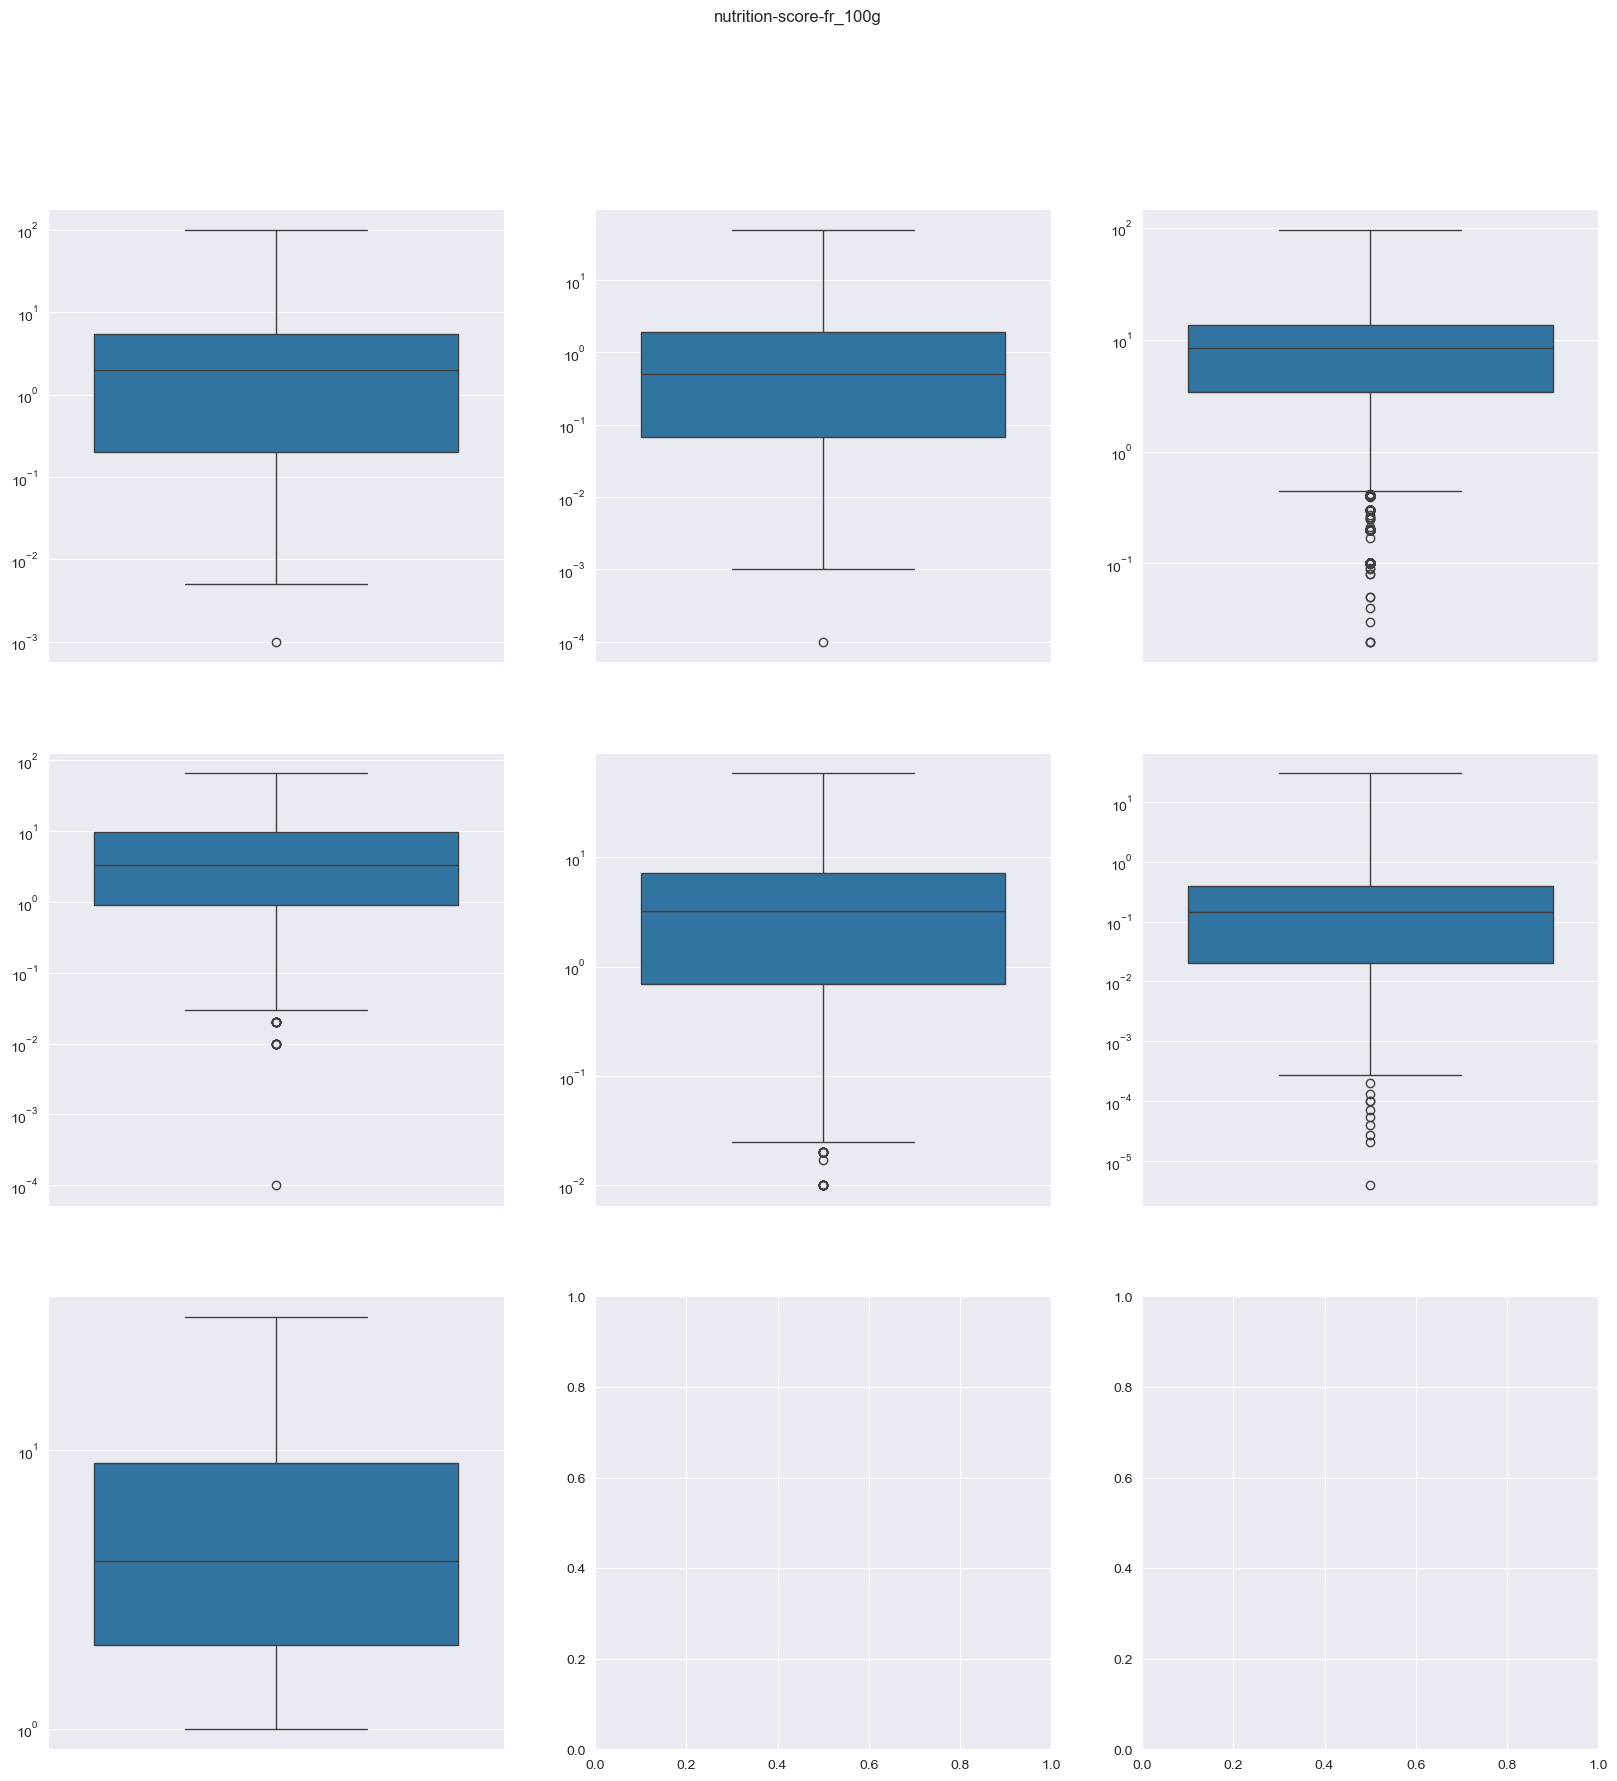

In [27]:
# Retire les inconnus dans les groups
pnns2 = pnns2[pnns2['pnns_groups_2'] != 'unknown']

#Sélectionne les colonnes avec des entiers
data_tsne = pnns2.select_dtypes(include='float64')
#On retire les colonnes qui font trop de bruits ou qui serait doublons (salt_100g pour sodium_100g)
data_tsne = data_tsne.drop(['energy_100g','ingredients_from_palm_oil_n','ingredients_that_may_be_from_palm_oil_n','salt_100g'],axis=1)

fig, ax= plt.subplots(3,3,figsize=(20,20))
i=0
for column in data_tsne:
    x, y = divmod(i, 3)
    sns.boxplot(data_tsne[column].values,ax=ax[x,y],log_scale=True)
    fig.suptitle(column)
    i+=1

In [28]:
# Corrige les fautes de syntax
pnns2.replace('vegetables','Vegetables',inplace=True)
pnns2.replace('legumes','Vegetables',inplace=True)
pnns2.replace('Legumes','Vegetables',inplace=True)
pnns2.replace('fruits','Fruits',inplace=True)
pnns2.replace('cereals','Cereals',inplace=True)
pnns2.replace('nuts','Nuts',inplace=True)

<Axes: xlabel='carbohydrates_100g', ylabel='pnns_groups_2'>

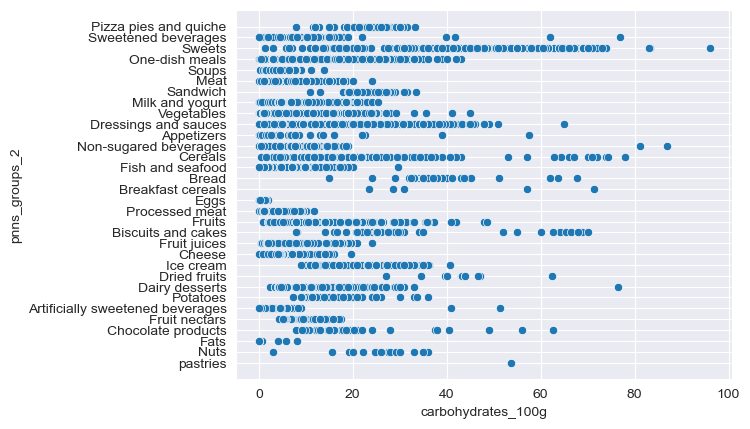

In [29]:
sns.scatterplot(pnns2, x='carbohydrates_100g', y='pnns_groups_2')

<Axes: xlabel='saturated-fat_100g', ylabel='pnns_groups_2'>

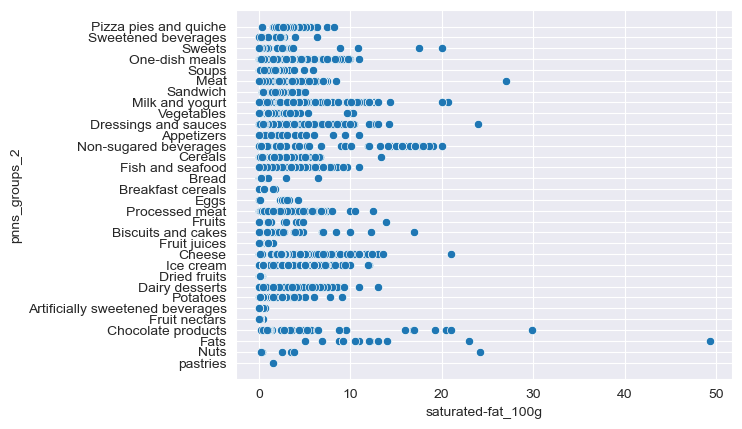

In [30]:
sns.scatterplot(pnns2, x='saturated-fat_100g', y='pnns_groups_2')

<Axes: xlabel='fat_100g', ylabel='pnns_groups_2'>

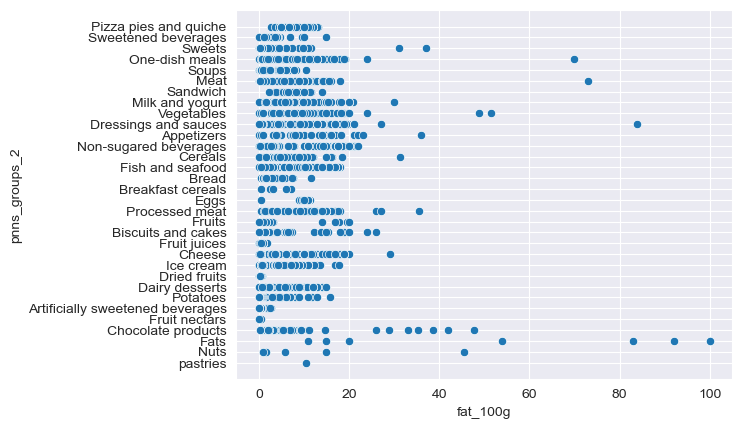

In [31]:
sns.scatterplot(pnns2, x='fat_100g', y='pnns_groups_2')

<Axes: xlabel='sugars_100g', ylabel='pnns_groups_2'>

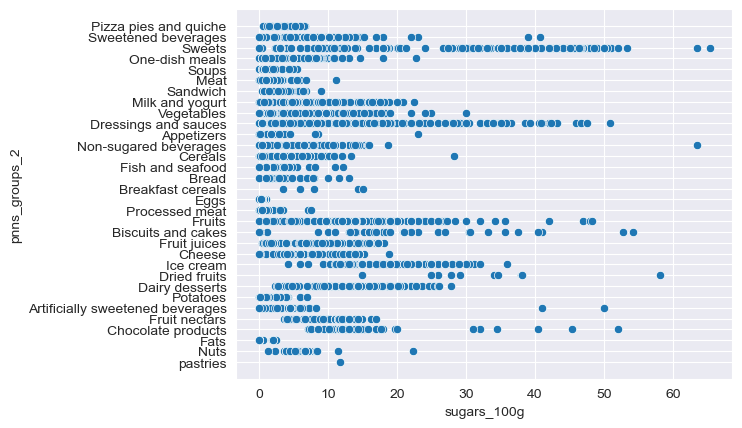

In [32]:
sns.scatterplot(pnns2, x='sugars_100g', y='pnns_groups_2')

<Axes: xlabel='proteins_100g', ylabel='pnns_groups_2'>

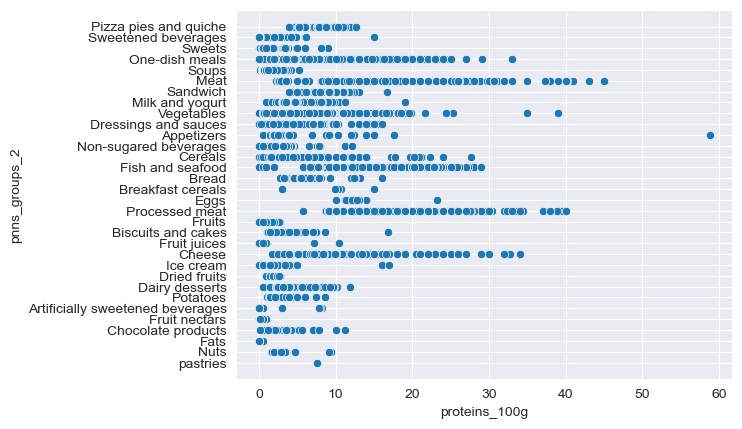

In [33]:
sns.scatterplot(pnns2, x='proteins_100g', y='pnns_groups_2')

<Axes: xlabel='sodium_100g', ylabel='pnns_groups_2'>

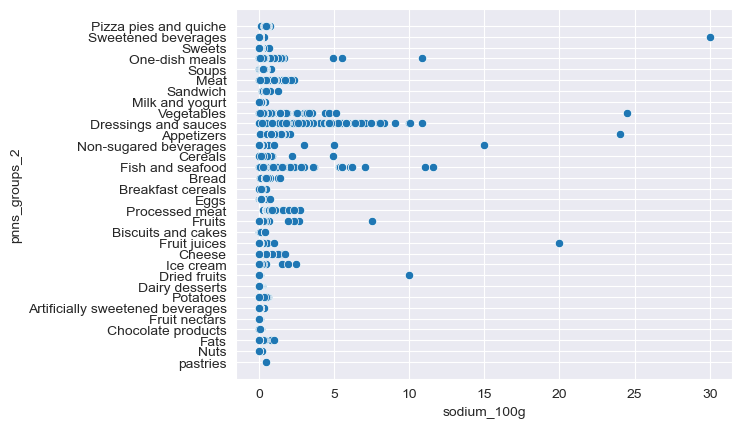

In [34]:
sns.scatterplot(pnns2, x='sodium_100g', y='pnns_groups_2')

<Axes: xlabel='nutrition-score-fr_100g', ylabel='pnns_groups_2'>

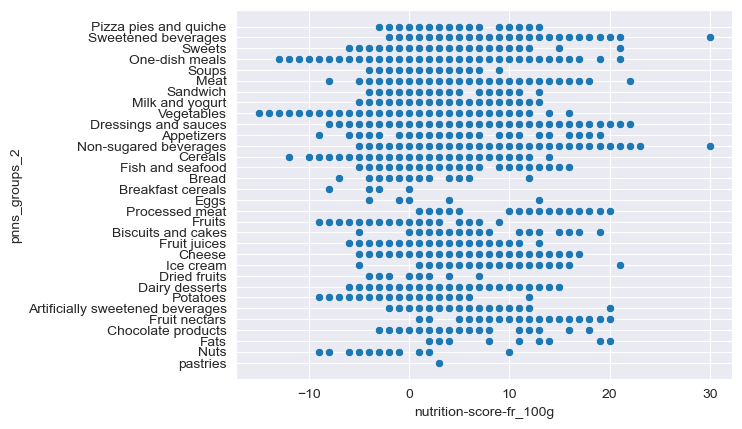

In [35]:
sns.scatterplot(pnns2, x='nutrition-score-fr_100g', y='pnns_groups_2')

On réduit le nombre de groupes, en les rassemblant dans des catégories plus générales

In [36]:
pnns2.replace('Dairy desserts','Milk',inplace=True)
pnns2.replace('Ice cream','Milk',inplace=True)
pnns2.replace('Milk and yogurt','Milk',inplace=True)
pnns2.replace('Breakfast cereals','Cereals',inplace=True)
pnns2.replace('Bread','Cereals',inplace=True)
pnns2.replace('Fruit juices','Fruits',inplace=True)
pnns2.replace('Fruit nectars','Fruits',inplace=True)
pnns2.replace('Processed meat','Proteins',inplace=True)
pnns2.replace('Meat','Proteins',inplace=True)
pnns2.replace('Fish and seafood','Proteins',inplace=True)
pnns2.replace('Eggs','Proteins',inplace=True)
pnns2.replace('Cheese','Proteins',inplace=True)
pnns2.replace('One-dish meals','Meals',inplace=True)
pnns2.replace('Pizza pies and quiche','Meals',inplace=True)
pnns2.replace('Sandwich','Meals',inplace=True)
pnns2.replace('Soups','Vegetables',inplace=True)
pnns2.replace('Chocolate products','Sweets',inplace=True)
pnns2.replace('Dried fruits','Sweets',inplace=True)
pnns2.replace('Nuts','Others',inplace=True)
pnns2.replace('pastries','Others',inplace=True)
pnns2.replace('Fats','Others',inplace=True)
pnns2.replace('Appetizers','Others',inplace=True)
pnns2.replace('Biscuits and cakes','Others',inplace=True)
pnns2.replace('Potatoes','Others',inplace=True)


In [37]:
pnns2['pnns_groups_2'].value_counts()

pnns_groups_2
Meals                               3778
Proteins                            3416
Milk                                2874
Vegetables                          2680
Fruits                              2342
Dressings and sauces                1402
Sweetened beverages                 1249
Non-sugared beverages               1071
Cereals                              561
Sweets                               557
Artificially sweetened beverages     208
Others                               190
Name: count, dtype: int64

In [38]:
from sklearn.manifold import TSNE

print('Instantiation...')
tsne = TSNE(perplexity=5,metric='euclidean', init='pca')

# fit transform les données
print('Fit_Transforme les données...')
x_tsne = tsne.fit_transform(data_tsne)


Instantiation...
Fit_Transforme les données...


Scatter


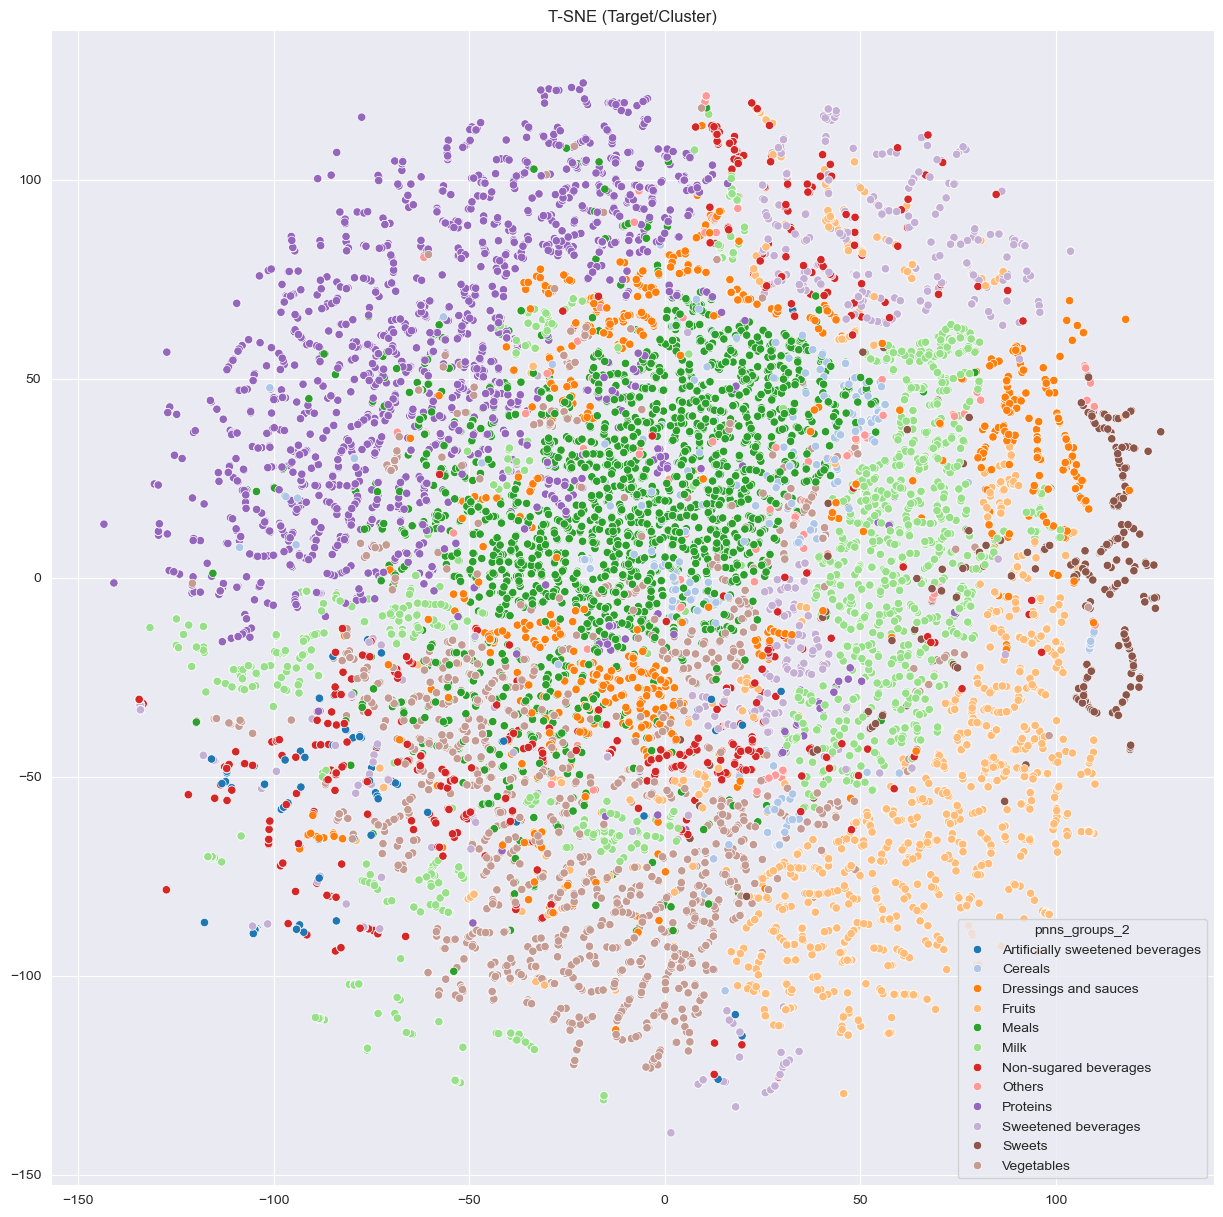

In [39]:
from matplotlib.pyplot import scatter
from sklearn.preprocessing import LabelEncoder

# encode les noms de groupes pour les associer à une couleur
le = LabelEncoder()
le.fit(pnns2['pnns_groups_2'])
encoder = le.transform(pnns2['pnns_groups_2'])
encoder.reshape(20328,1)

# taille du graphique
taille = 15

fig, ax = plt.subplots(1, 1, figsize=(taille, taille))

print('Scatter')
sns.scatterplot(x=tsne.embedding_[:,0],y=tsne.embedding_[:,1], hue=pnns2['pnns_groups_2'], palette='tab20',hue_order=le.classes_,)
ax.set_title('T-SNE (Target/Cluster)')
sns.set_theme(style='dark')

plt.show()